In [240]:
import numpy as np
from collections import Counter

##### Task: find out the password.
#### Use radix sort and counting sort for sorting anagrams
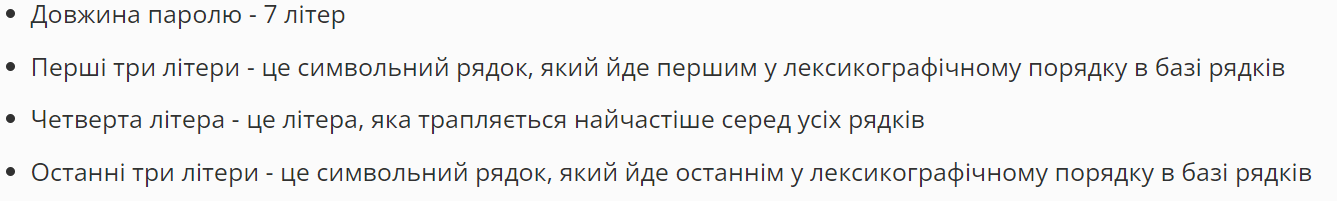

In [241]:
def read_array(filename): #read from file into matrix
    with open(f'{filename}.txt', 'r') as f:
        l = [line[:-1] for line in f]
    return l

def get_digit(number, n):
    return int(number) // 10**n % 10

def get_digit2(number, n): #reads a pair digits at once 
    return int(number) // 10**(n*2) % 100

def find(element, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == element:
                return [i, j]

In [242]:
def counting_sort(A, k):
    np_A = np.array(A)
    C = []
    B = [0 for i in range(len(A))]
    for i in range(k+1):
        C.append(np.count_nonzero(np_A == i))
    for j in range(1, k+1):
        C[j] += C[j-1]
    for i in reversed(range(0, len(A))):
        B[C[A[i]]-1] = A[i]
        C[A[i]] -= 1
    return B

def match_back(ar, A, sorted, i):
    i_dict = {0:2, 1:1, 2:0}
    radix = i_dict[i]
    new_A = []
    for item in sorted:
        ind = A.index(item)
        new_A.append(ar[ind])
        A[ind] = None
    return new_A

def radix_sort(arr, d, k):
#     tests = [] #for checking the task 
    ar = arr[:]
    for i in range(d):
        A = [get_digit2(num, i) for num in ar]
        sorted = counting_sort(A, k)
        ar = match_back(ar, A, sorted, i)
#         #for checking the task
#         print("iter=", i, "ar[0]=", ar[0])
#         tests.append(ar[0])
#     test_words = number_to_word(tests)
#     print("test_words=", test_words)
    return ar

In [243]:
alph_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 
            'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 
            'x': 24, 'y': 25, 'z': 26}

In [244]:
def word_to_number(words_arr): 
    n = 3 #trigrams
    A = []
    for word in words_arr:
        el = [alph_dict[let] for let in word]
        number = 0
        for i in range(len(el)):
            number += el[i]*(10**(((n+1)-i*2)))
        A.append(number)
    return A

def number_to_word(nums_arr):
    A = []
    key_list = list(alph_dict.keys())
    val_list = list(alph_dict.values())
    for num in nums_arr:
        letters = [key_list[val_list.index(get_digit2(num, i))] for i in reversed(range(3))]
        word = ''.join(letters)
        A.append(word)
    return A


def get_sorted_words(words):
    A = word_to_number(words)
    sor = radix_sort(A, 3, 100)
    res = number_to_word(sor)
    if list(np.sort(A)) == sor:
        print("TRUE")
    else: print("FALSE")
    return res

sorted_anagrams = get_sorted_words(anagrams_arr)
print(sorted_anagrams)

TRUE
['aao', 'aax', 'abj', 'acf', 'adk', 'adr', 'ady', 'aeg', 'aew', 'afk', 'afm', 'afs', 'afw', 'agu', 'ahd', 'ahk', 'ahz', 'aib', 'akm', 'ald', 'ama', 'amw', 'anp', 'anq', 'apa', 'apb', 'aso', 'atd', 'att', 'aub', 'auv', 'awd', 'awk', 'aws', 'awx', 'axd', 'axr', 'azb', 'azy', 'azy', 'azz', 'bai', 'bbj', 'bci', 'bdd', 'bdf', 'bdr', 'ber', 'bex', 'bgt', 'bhl', 'bii', 'blt', 'bmc', 'bnz', 'brl', 'brn', 'brw', 'bso', 'bsx', 'bti', 'bto', 'bue', 'bva', 'bvh', 'bvh', 'bvm', 'bwm', 'bxa', 'bxk', 'bxt', 'cao', 'cdt', 'cek', 'cfc', 'cfj', 'chl', 'ciq', 'cir', 'civ', 'cjq', 'ckc', 'ckq', 'cmk', 'cnz', 'coc', 'cot', 'cou', 'cox', 'cpb', 'cpk', 'cpl', 'cpq', 'cqu', 'cqy', 'crz', 'csf', 'cts', 'cuu', 'cuv', 'cwy', 'cxd', 'cxm', 'cxn', 'cxo', 'cyr', 'cza', 'dae', 'dap', 'dbv', 'dci', 'dct', 'deg', 'dep', 'dfe', 'dfz', 'dik', 'din', 'djj', 'djm', 'dlf', 'dlu', 'dml', 'dni', 'dou', 'dpa', 'dpd', 'dph', 'dpj', 'dqf', 'dso', 'dst', 'dtz', 'dul', 'dup', 'dvh', 'dxi', 'dxx', 'dyv', 'dzt', 'eag', 'ear', 

In [245]:
#counting letter frequencies and finding password

def most_common_letter(words):
    a_string = ''.join(words)
    frequencies = Counter(a_string).most_common()
    mcl = frequencies[0][0]
    return mcl

def find_password(words):
    sor = get_sorted_words(words)
    mcl = most_common_letter(sor)
    password = sor[0] + mcl + sor[-1]
    return password


anagrams_arr = read_array("anagrams")

pw = find_password(anagrams_arr)
print("password=", pw)

TRUE
password= aaojzzr
